<a href="https://colab.research.google.com/github/MBrandao07/Spaceship_Titanic_Kaggle/blob/main/Spaceship_Titanic_Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
import pod_academy_functions as pod

import warnings
warnings.filterwarnings('ignore')

In [5]:
# verificando todas as funções na biblioteca pod_academy_functions
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/pod_academy_functions.py', 'r') as f:
    print(f.read())

# Função para cálculo do Gini normalizado

def gini_normalizado(actual, pred, cmpcol = 0, sortcol = 1):
    import numpy as np
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def pod_generate_metadata(dataframe):
    import pandas as pd
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100

In [6]:
df_train_00 = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/train.csv')
df_train_00.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_train_00.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
metadata_df = pod.pod_academy_generate_metadata(df_train_00,
                                          ids=['PassengerId'],
                                          targets=['Transported'],
                                          orderby = 'PC_NULOS')
metadata_df

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,CryoSleep,Explicativa,217,2.50,2,object
1,ShoppingMall,Explicativa,208,2.39,1115,float64
2,VIP,Explicativa,203,2.34,2,object
3,HomePlanet,Explicativa,201,2.31,3,object
4,Name,Explicativa,200,2.30,8473,object
5,Cabin,Explicativa,199,2.29,6560,object
6,VRDeck,Explicativa,188,2.16,1306,float64
7,Spa,Explicativa,183,2.11,1327,float64
8,FoodCourt,Explicativa,183,2.11,1507,float64
9,Destination,Explicativa,182,2.09,3,object


# **Data Prep**

#### Antes de dividir nossas colunas em treino e teste, mas alterar os tipos das colunas com valores bool

In [9]:
# alterando na base de treino
df_train_00[['VIP','CryoSleep','Transported']] = df_train_00[['VIP','CryoSleep','Transported']].replace({True: 'True', False: 'False'})
df_train_00[['VIP','CryoSleep','Transported']] = df_train_00[['VIP','CryoSleep','Transported']].replace({'True': 1, 'False': 0})
df_train_00[['VIP','CryoSleep','Transported']] = df_train_00[['VIP','CryoSleep','Transported']].fillna(value=0)
df_train_00[['VIP','CryoSleep','Transported']] = df_train_00[['VIP','CryoSleep','Transported']].astype(int)

#### Temos a informação de que a variável "Cabin" está dividida em 3 sessões, sendo Deck / Cabin_num / Side, então vamos dividi-la em 3 variáveis

In [10]:
# dividindo a coluna Cabin
df_train_00[["Deck", "Cabin_num", "Side"]] = df_train_00["Cabin"].str.split("/", expand=True)

# removendo a coluna após a divisão
df_train_00 = df_train_00.drop("Cabin", axis=1)

In [11]:
# preenchendo os valores nulos da coluna "Cabin_num" na base de treino
df_train_00[['Cabin_num']] = df_train_00[['Cabin_num']].fillna(value=0)
df_train_00[['Cabin_num']] = df_train_00[['Cabin_num']].astype(int)

In [12]:
df_train_00.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [13]:
# separando os dados em 70% dos dados para treino e 30% para validação
train, test = train_test_split(df_train_00, test_size=0.3, random_state=42)
train.shape,test.shape

((6085, 16), (2608, 16))

In [14]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
3032,3282_03,Europa,0,TRAPPIST-1e,43.0,0,0.0,1440.0,0.0,85.0,150.0,Sheratz Prighty,1,B,120,S
7757,8276_02,Europa,1,TRAPPIST-1e,23.0,0,0.0,0.0,0.0,0.0,0.0,Zaurion Tractive,1,C,273,P
1795,1911_01,Earth,0,TRAPPIST-1e,46.0,0,8.0,652.0,0.0,5.0,90.0,Dia Cartez,0,G,300,S
1702,1808_01,Earth,0,TRAPPIST-1e,33.0,0,0.0,763.0,8.0,2.0,30.0,Rician Pollarkeeks,0,F,346,S
6634,6995_01,Earth,0,55 Cancri e,24.0,0,0.0,58.0,618.0,0.0,41.0,Stany Hamberterry,0,F,1334,S


In [15]:
df_train_01 = train.copy()
df_test_01 = test.copy()

In [16]:
# removendo as variáveis que não agregam e o target do df treino
df_train_02 = df_train_01.drop(['PassengerId','Name','Transported'], axis=1)
df_train_02.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
3032,Europa,0,TRAPPIST-1e,43.0,0,0.0,1440.0,0.0,85.0,150.0,B,120,S
7757,Europa,1,TRAPPIST-1e,23.0,0,0.0,0.0,0.0,0.0,0.0,C,273,P
1795,Earth,0,TRAPPIST-1e,46.0,0,8.0,652.0,0.0,5.0,90.0,G,300,S
1702,Earth,0,TRAPPIST-1e,33.0,0,0.0,763.0,8.0,2.0,30.0,F,346,S
6634,Earth,0,55 Cancri e,24.0,0,0.0,58.0,618.0,0.0,41.0,F,1334,S


In [17]:
# removendo as variáveis que não agregam e o target do df teste
df_test_02 = df_test_01.drop(['PassengerId','Name','Transported'], axis=1)
df_test_02.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
304,Mars,0,TRAPPIST-1e,19.0,0,417.0,349.0,634.0,3.0,1057.0,F,63,S
2697,Earth,0,TRAPPIST-1e,18.0,0,4.0,904.0,0.0,0.0,1.0,G,460,S
8424,Earth,1,TRAPPIST-1e,41.0,0,0.0,0.0,0.0,0.0,0.0,G,1449,S
1672,Earth,0,TRAPPIST-1e,35.0,0,0.0,338.0,436.0,NaN,0.0,G,291,P
8458,Europa,1,TRAPPIST-1e,43.0,0,0.0,0.0,0.0,0.0,0.0,D,288,P


In [18]:
# gerando os metadados do dataframe
metadata_df = pod.pod_academy_generate_metadata(df_train_02,
                                          ids=['id'],
                                          targets=['target'],
                                          orderby = 'PC_NULOS')
metadata_df

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,ShoppingMall,Explicativa,146,2.40,891,float64
1,Deck,Explicativa,142,2.33,8,object
2,Side,Explicativa,142,2.33,2,object
3,HomePlanet,Explicativa,140,2.30,3,object
4,Age,Explicativa,129,2.12,80,float64
5,VRDeck,Explicativa,129,2.12,1050,float64
6,FoodCourt,Explicativa,122,2.00,1216,float64
7,Destination,Explicativa,122,2.00,3,object
8,Spa,Explicativa,122,2.00,1077,float64
9,RoomService,Explicativa,114,1.87,1026,float64


#### Substituindo os nulos das variáveis numéricas na amostra de treino pela média

In [19]:
def pod_custom_fillna(df):
  numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
  means = {}

  for col in numerical_cols:
    means[col] = df[col].mean()
    df[col].fillna(means[col], inplace=True)

  categorical_cols = df.select_dtypes(include=['object']).columns
  df[categorical_cols] = df[categorical_cols].fillna('Unknown')

  return df, means

In [20]:
# substituindo os valores pelas médias e salvando em um arquivo
df_train_03, means = pod_custom_fillna(df_train_02)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_fillna.pkl', 'wb') as f:
  pickle.dump(means, f)

In [21]:
df_train_03.shape

(6085, 13)

In [22]:
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means

{'CryoSleep': np.float64(0.3418241577649959),
 'Age': np.float64(28.85359301544661),
 'VIP': np.float64(0.0228430566967954),
 'RoomService': np.float64(228.27013900519177),
 'FoodCourt': np.float64(470.91396947845044),
 'ShoppingMall': np.float64(172.94022562720997),
 'Spa': np.float64(316.2906255240651),
 'VRDeck': np.float64(309.1140026863667),
 'Cabin_num': np.float64(592.0320460147905)}

In [23]:
def pod_custom_fillna_prod(df, means):
  for col, mean_value in means.items():
    df[col].fillna(mean_value, inplace=True)

  categorical_cols = df.select_dtypes(include=['object']).columns
  df[categorical_cols] = df[categorical_cols].fillna('Unknown')

  return df

In [24]:
# substituindo no df de teste
df_test_03 = pod_custom_fillna_prod(df_test_02,loaded_means)
df_test_03.shape

(2608, 13)

#### Padronizando os dados

In [25]:
metadados = pod.pod_academy_generate_metadata(df_train_03,
                                          ids=['id'],
                                          targets=['target'],
                                          orderby = 'PC_NULOS')
metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,HomePlanet,Explicativa,0,0.0,4,object
1,CryoSleep,Explicativa,0,0.0,2,int64
2,Destination,Explicativa,0,0.0,4,object
3,Age,Explicativa,0,0.0,81,float64
4,VIP,Explicativa,0,0.0,2,int64
5,RoomService,Explicativa,0,0.0,1027,float64
6,FoodCourt,Explicativa,0,0.0,1217,float64
7,ShoppingMall,Explicativa,0,0.0,892,float64
8,Spa,Explicativa,0,0.0,1078,float64
9,VRDeck,Explicativa,0,0.0,1051,float64


In [26]:
from sklearn.preprocessing import StandardScaler

# Excluindo IDs, Targets e objetivos
df_id_target_obj = metadados[
    (metadados['USO_FEATURE'] == 'ID') |
    (metadados['USO_FEATURE'] == 'Target') |
    (metadados['TIPO_FEATURE'] == 'object')
]
lista_id_target = list(df_id_target_obj.FEATURE.values)
print('Lista de IDs e Target: ',lista_id_target)

# Identifica colunas a padronizar (restantes)
cols_para_padronizar = [col for col in df_train_03.columns if col not in lista_id_target and df_train_03[col].dtype in ['float64', 'int64']]
print('Colunas a padronizar: ',cols_para_padronizar)

# instanciando o scaler
scaler = StandardScaler()

# padronizando a base de treino
df_train_03_scaled = scaler.fit_transform(df_train_03[cols_para_padronizar])
df_train_04 = df_train_03.copy()
df_train_04[cols_para_padronizar] = df_train_03_scaled

# salvando o scaler em um arquivo .pkl
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Lista de IDs e Target:  ['HomePlanet', 'Destination', 'Deck', 'Side']
Colunas a padronizar:  ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']


In [27]:
df_train_04.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
3032,Europa,-0.720660,TRAPPIST-1e,0.985598,-0.152896,-0.334068,0.605156,-0.280573,-0.206886,-0.135787,B,-0.919294,S
7757,Europa,1.387617,TRAPPIST-1e,-0.407827,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,C,-0.621323,P
1795,Earth,-0.720660,TRAPPIST-1e,1.194612,-0.152896,-0.322361,0.113081,-0.280573,-0.278445,-0.186990,G,-0.568740,S
1702,Earth,-0.720660,TRAPPIST-1e,0.288886,-0.152896,-0.334068,0.182396,-0.267594,-0.281129,-0.238194,F,-0.479154,S
6634,Earth,-0.720660,55 Cancri e,-0.338156,-0.152896,-0.334068,-0.257849,0.722052,-0.282918,-0.228806,F,1.445002,S


In [28]:
# Carregar o scaler
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Lista de colunas padronizadas
cols_para_padronizar = [col for col in df_test_03.columns if col in loaded_scaler.feature_names_in_]

# Aplicar transformação apenas nas colunas numéricas selecionadas
df_test_03_scaled = loaded_scaler.transform(df_test_03[cols_para_padronizar])

# Substituir as colunas escaladas na base original
df_test_04 = df_test_03.copy()
df_test_04[cols_para_padronizar] = df_test_03_scaled

df_test_04.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
304,Mars,-0.720660,TRAPPIST-1e,-0.686513,-0.152896,0.276202,-0.076130,0.748010,-0.280234,0.638240,F,-1.030303,S
2697,Earth,-0.720660,TRAPPIST-1e,-0.756184,-0.152896,-0.328214,0.270445,-0.280573,-0.282918,-0.262942,G,-0.257136,S
8424,Earth,1.387617,TRAPPIST-1e,0.846256,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,G,1.668967,S
1672,Earth,-0.720660,TRAPPIST-1e,0.428228,-0.152896,-0.334068,-0.083000,0.426781,0.000000,-0.263795,G,-0.586268,P
8458,Europa,1.387617,TRAPPIST-1e,0.985598,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,D,-0.592110,P


#### Tratando as variáveis categóricas de alta cardinalidade com o LaberEncoder

In [29]:
print(df_train_04.shape)
print(df_test_04.shape)

(6085, 13)
(2608, 13)


In [30]:
card_cutoff = 20
df_categ_labelenc = metadados[(metadados['CARDINALIDADE'] > card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_vars_abt = list(df_train_04.columns)
lista_lenc = list(df_categ_labelenc.FEATURE.values)

print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  []


In [31]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    df_train_04[col] = encoder.fit_transform(df_train_04[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_labelenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [32]:
# Carregar os encoders e a lista de colunas
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_labelenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        df_test_04[col] = loaded_encoders[col].transform(df_test_04[col])

#### Tratando as variáveis categóricas de baixa cardinalidade com o OneHotEncoder

As colunas CryoSleep e VIP estão recebendo valores boolean, então precisamos altera-los para string


In [33]:
from sklearn.preprocessing import OneHotEncoder

card_cutoff = 20
df_categ_onehot = metadados[(metadados['CARDINALIDADE'] <= card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_onehot = list(df_categ_onehot.FEATURE.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df_train_04[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_train_04.index)

df_train_04 = pd.concat([df_train_04.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_onehotenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

Lista de vars para OneHot Encoding:  ['HomePlanet', 'Destination', 'Deck', 'Side']


In [34]:
# Carregar o encoder na tabela teste
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_onehotenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']


encoded_data_test = loaded_encoder.transform(df_test_04[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df_test_04.index)

df_test_04 = pd.concat([df_test_04.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

In [35]:
print(df_train_04.shape)
print(df_test_04.shape)

(6085, 25)
(2608, 25)


In [36]:
df_train_04.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
3032,-0.720660,0.985598,-0.152896,-0.334068,0.605156,-0.280573,-0.206886,-0.135787,-0.919294,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7757,1.387617,-0.407827,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.621323,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,-0.720660,1.194612,-0.152896,-0.322361,0.113081,-0.280573,-0.278445,-0.186990,-0.568740,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1702,-0.720660,0.288886,-0.152896,-0.334068,0.182396,-0.267594,-0.281129,-0.238194,-0.479154,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6634,-0.720660,-0.338156,-0.152896,-0.334068,-0.257849,0.722052,-0.282918,-0.228806,1.445002,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
df_test_04.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
304,-0.720660,-0.686513,-0.152896,0.276202,-0.076130,0.748010,-0.280234,0.638240,-1.030303,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2697,-0.720660,-0.756184,-0.152896,-0.328214,0.270445,-0.280573,-0.282918,-0.262942,-0.257136,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8424,1.387617,0.846256,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,1.668967,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1672,-0.720660,0.428228,-0.152896,-0.334068,-0.083000,0.426781,0.000000,-0.263795,-0.586268,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8458,1.387617,0.985598,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.592110,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# trazendo o id e o target para a tabela pós dataprep

abt_train = df_train_04.merge(train[['PassengerId','Name','Transported']], left_index=True, right_index=True, how='inner')
abt_test = df_test_04.merge(test[['PassengerId','Name','Transported']], left_index=True, right_index=True, how='inner')

In [39]:
abt_train.to_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_train.csv')
abt_test.to_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_test.csv')

# **Feature Selection**

In [40]:
abt_00 = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','PassengerId', 'Name'],inplace=True)
abt_00.shape

(6085, 26)

In [41]:
abt_00.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown,Transported
0,-0.720660,0.985598,-0.152896,-0.334068,0.605156,-0.280573,-0.206886,-0.135787,-0.919294,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1.387617,-0.407827,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.621323,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.720660,1.194612,-0.152896,-0.322361,0.113081,-0.280573,-0.278445,-0.186990,-0.568740,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.720660,0.288886,-0.152896,-0.334068,0.182396,-0.267594,-0.281129,-0.238194,-0.479154,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.720660,-0.338156,-0.152896,-0.334068,-0.257849,0.722052,-0.282918,-0.228806,1.445002,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


#### Selecionando as variáveis mais importantes com o Feature Importance

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
# dividindo os dados entre variáveis explicativas e target
X = abt_00.drop(axis=1,columns='Transported')
y = abt_00.Transported

# treinando o modelo com algoritmo Random Forest
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  8


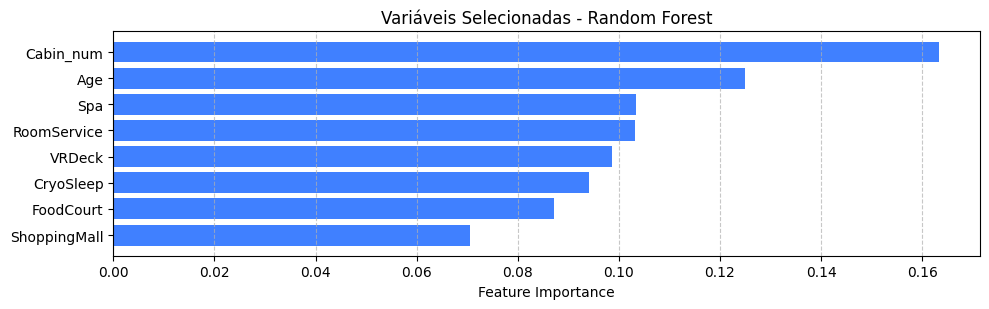

In [44]:
# obtendo a importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# ordenando as variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# estabelecendo um limite de corte, sendo este limite uma % da importância máxima
cutoff_maximp = 0.4

cutoff = cutoff_maximp * feature_importances.max()

# selecionando as variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# ordenando as variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# filtrando o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# ajustando o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# plotando as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# salvando a lista de variáveis em um arquivo .pkl
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [46]:
# carregando a lista de variáveis do arquivo .pkl
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']


In [47]:
# criando um df com apenas a variáveis selecionadas e o target
lista_features = loaded_lista + ['Transported']
abt_01 = abt_00[lista_features]

abt_01.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Transported
0,-0.720660,0.985598,-0.334068,0.605156,-0.280573,-0.206886,-0.135787,-0.919294,1
1,1.387617,-0.407827,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.621323,1
2,-0.720660,1.194612,-0.322361,0.113081,-0.280573,-0.278445,-0.186990,-0.568740,0
3,-0.720660,0.288886,-0.334068,0.182396,-0.267594,-0.281129,-0.238194,-0.479154,0
4,-0.720660,-0.338156,-0.334068,-0.257849,0.722052,-0.282918,-0.228806,1.445002,0


In [48]:
# criando o df da base de teste
abt_test = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','PassengerId','Name'],inplace=True)
abt_test.shape

(2608, 26)

In [49]:
# criando um df de teste com as variáveis selecionadas e o target
lista_features = loaded_lista + ['Transported']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Transported
0,-0.720660,-0.686513,0.276202,-0.076130,0.748010,-0.280234,0.638240,-1.030303,1
1,-0.720660,-0.756184,-0.328214,0.270445,-0.280573,-0.282918,-0.262942,-0.257136,0
2,1.387617,0.846256,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,1.668967,0
3,-0.720660,0.428228,-0.334068,-0.083000,0.426781,0.000000,-0.263795,-0.586268,1
4,1.387617,0.985598,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.592110,1


In [50]:
abt_01.to_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_fs_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_fs_test.csv')

# **Modelagem**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

In [52]:
abt_00 = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/abt_fs_train.csv',index_col=0)

abt_00.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Transported
0,-0.720660,0.985598,-0.334068,0.605156,-0.280573,-0.206886,-0.135787,-0.919294,1
1,1.387617,-0.407827,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-0.621323,1
2,-0.720660,1.194612,-0.322361,0.113081,-0.280573,-0.278445,-0.186990,-0.568740,0
3,-0.720660,0.288886,-0.334068,0.182396,-0.267594,-0.281129,-0.238194,-0.479154,0
4,-0.720660,-0.338156,-0.334068,-0.257849,0.722052,-0.282918,-0.228806,1.445002,0


In [53]:
# verificando o balanceamento da variável target
abt_00.Transported.describe()

,Transported
count,6085.000000
mean,0.502712
std,0.500034
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


A variável Target já se encontra bem balanceada, então não é necessário retirar uma amostra balanceada

In [54]:
# separando as variáveis explicativas do target
X = abt_00.drop(columns=["Transported"])
y = abt_00["Transported"]

In [55]:
# separando a amostra utilizando o Holdout 70/30 (out-of-sample)
# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape

((4259, 8), (1826, 8))

## **Testando diferentes modelos**

### **Decision Tree Classifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# definindo o modelo
model = DecisionTreeClassifier(random_state=42)

# definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best', 'random'],
    'max_depth': [2, 4, 6, 10, 20, 30], # Profundidade máxima da árvore
    'min_samples_split': [0.0005, 0.001, 0.002, 0.004], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.0008, 0.008,0.02,0.04], # Número mínimo de amostras necessárias para estar em um nó folha.
    'class_weight': [None, 'balanced']
}

# calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='accuracy',  # 'roc_auc' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# medindo o tempo de execução
start_time = time.time()

# treinando o modelo com o grid search
grid.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

mins, secs = divmod(elapsed_time, 60)

# exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# exibindo a melhor pontuação (score) atingida com base na acurácia
print("Melhor Accuracy: ", round(grid.best_score_, 4))

# utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)
predprob = grid.best_estimator_.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print('Accuracy no teste -->', round(acc, 4))

print(f"Tempo de execução: {int(mins)} minutos e {int(secs)} segundos")

best_model_dt = grid.best_estimator_

Total de Modelos a serem Treinados: 1920
Melhores Parâmetros:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 0.008, 'min_samples_split': 0.0005, 'splitter': 'best'}
Melhor Accuracy:  0.7882
Accuracy no teste --> 0.7826
Tempo de execução: 0 minutos e 47 segundos


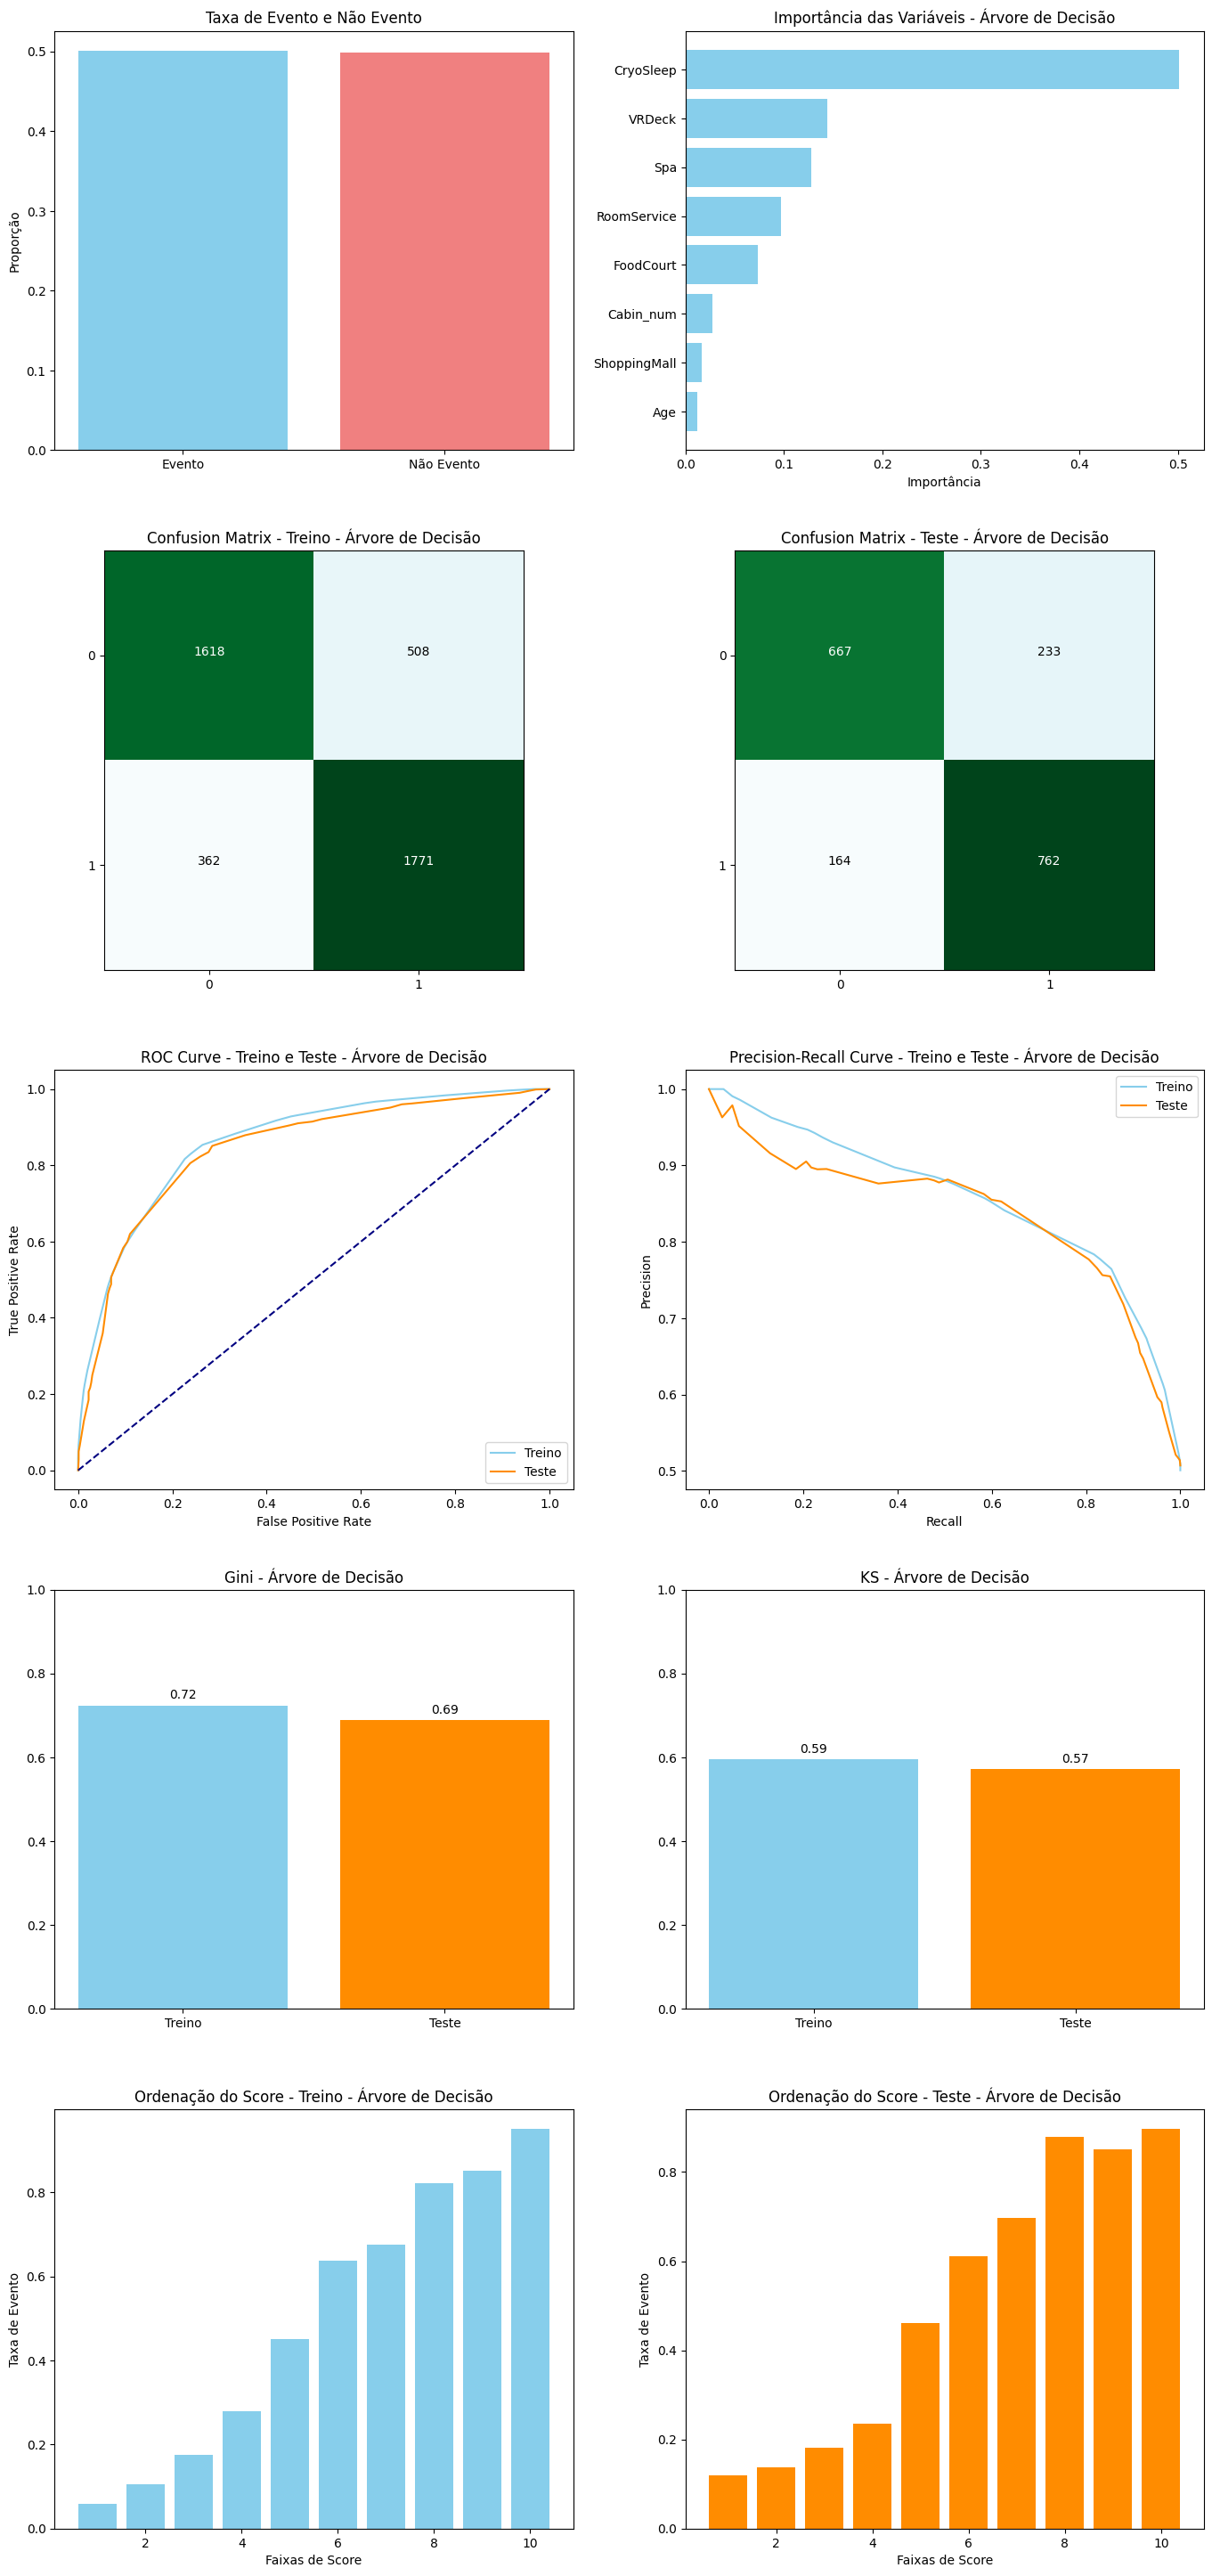

In [57]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, best_model_dt,nm_modelo='Árvore de Decisão')

### **Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

# definindo o modelo
model = LogisticRegression(max_iter=100)
model_sgs = LogisticRegression(max_iter=100)

# penalty='l2', # Tipo de regularização: 'l1', 'l2', 'elasticnet', 'none'
# dual=False, # Formulação primal e dual do problema de otimização da regressão logística, sendo recomendado manter como False quando temos mais amostras do que Variáveis
# tol=0.0001, # Tolerância para critério de parada.
# C=1.0, # Inverso da força de regularização; deve ser um valor flutuante positivo. Como valores menores, especifica uma regularização mais forte.
# fit_intercept=True, # Especifica se uma constante (ou seja, viés ou interceptação) deve ser adicionada à função de decisão.
# intercept_scaling=1, # Útil apenas quando o solver 'liblinear' é usado e self.fit_intercept é definido como True.
# class_weight=None, # Pesos associados às classes. Se não for fornecido, todas as classes são supostas ter peso um.
# random_state=None, # Semente usada pelo gerador de números aleatórios.
# solver='lbfgs', # Algoritmo a ser usado no problema de otimização: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, padrão='lbfgs'
# max_iter=100, # Número máximo de iterações para os solvers convergirem.
# multi_class='auto', # Se a opção escolhida for 'ovr', então um problema binário é ajustado para cada rótulo. Para 'multinomial', a perda minimizada é a perda multinomial ajustando todo o conjunto de dados de uma vez.
# verbose=0, # Para o solver 'liblinear' e 'lbfgs', defina o valor para qualquer inteiro positivo para classificar a verbosidade.
# warm_start=False, # Quando definido como True, reutiliza a solução da chamada anterior para ajustar como inicialização, caso contrário, apenas apaga a solução anterior.
# l1_ratio=None # O valor de Elastic-Net mixing parameter, com 0 <= l1_ratio <= 1. Somente usado se penalty='elasticnet'.


# definindo os parâmetros para o grid search
param_grid = {
    'penalty':['l1','l2'],
    'tol':[0.000001, 0.00001,0.0001,0.001, 0.0001],
    'C': [1.0, 2.0],
    'solver':['liblinear', 'saga'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
}



# calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['penalty']) * len(param_grid['tol']) * len(param_grid['C']) * len(param_grid['solver']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='accuracy',  # 'roc_auc' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# medindo o tempo de execução
start_time = time.time()

# treinando o modelo com o grid search
grid.fit(X_train, y_train)

# treinando modelo sem grid search para comparar
model_sgs.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

mins, secs = divmod(elapsed_time, 60)

# exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# exibindo a melhor pontuação (score) atingida com base na acurácia
print("Melhor Accuracy: ", round(grid.best_score_, 4))

# utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

predprob = grid.best_estimator_.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print('Accuracy no teste -->', round(acc, 4))

print(f"Tempo de execução: {int(mins)} minutos e {int(secs)} segundos")

best_model_rl = grid.best_estimator_

Total de Modelos a serem Treinados: 200
Melhores Parâmetros:  {'C': 2.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}
Melhor Accuracy:  0.7795
Accuracy no teste --> 0.7782
Tempo de execução: 0 minutos e 41 segundos


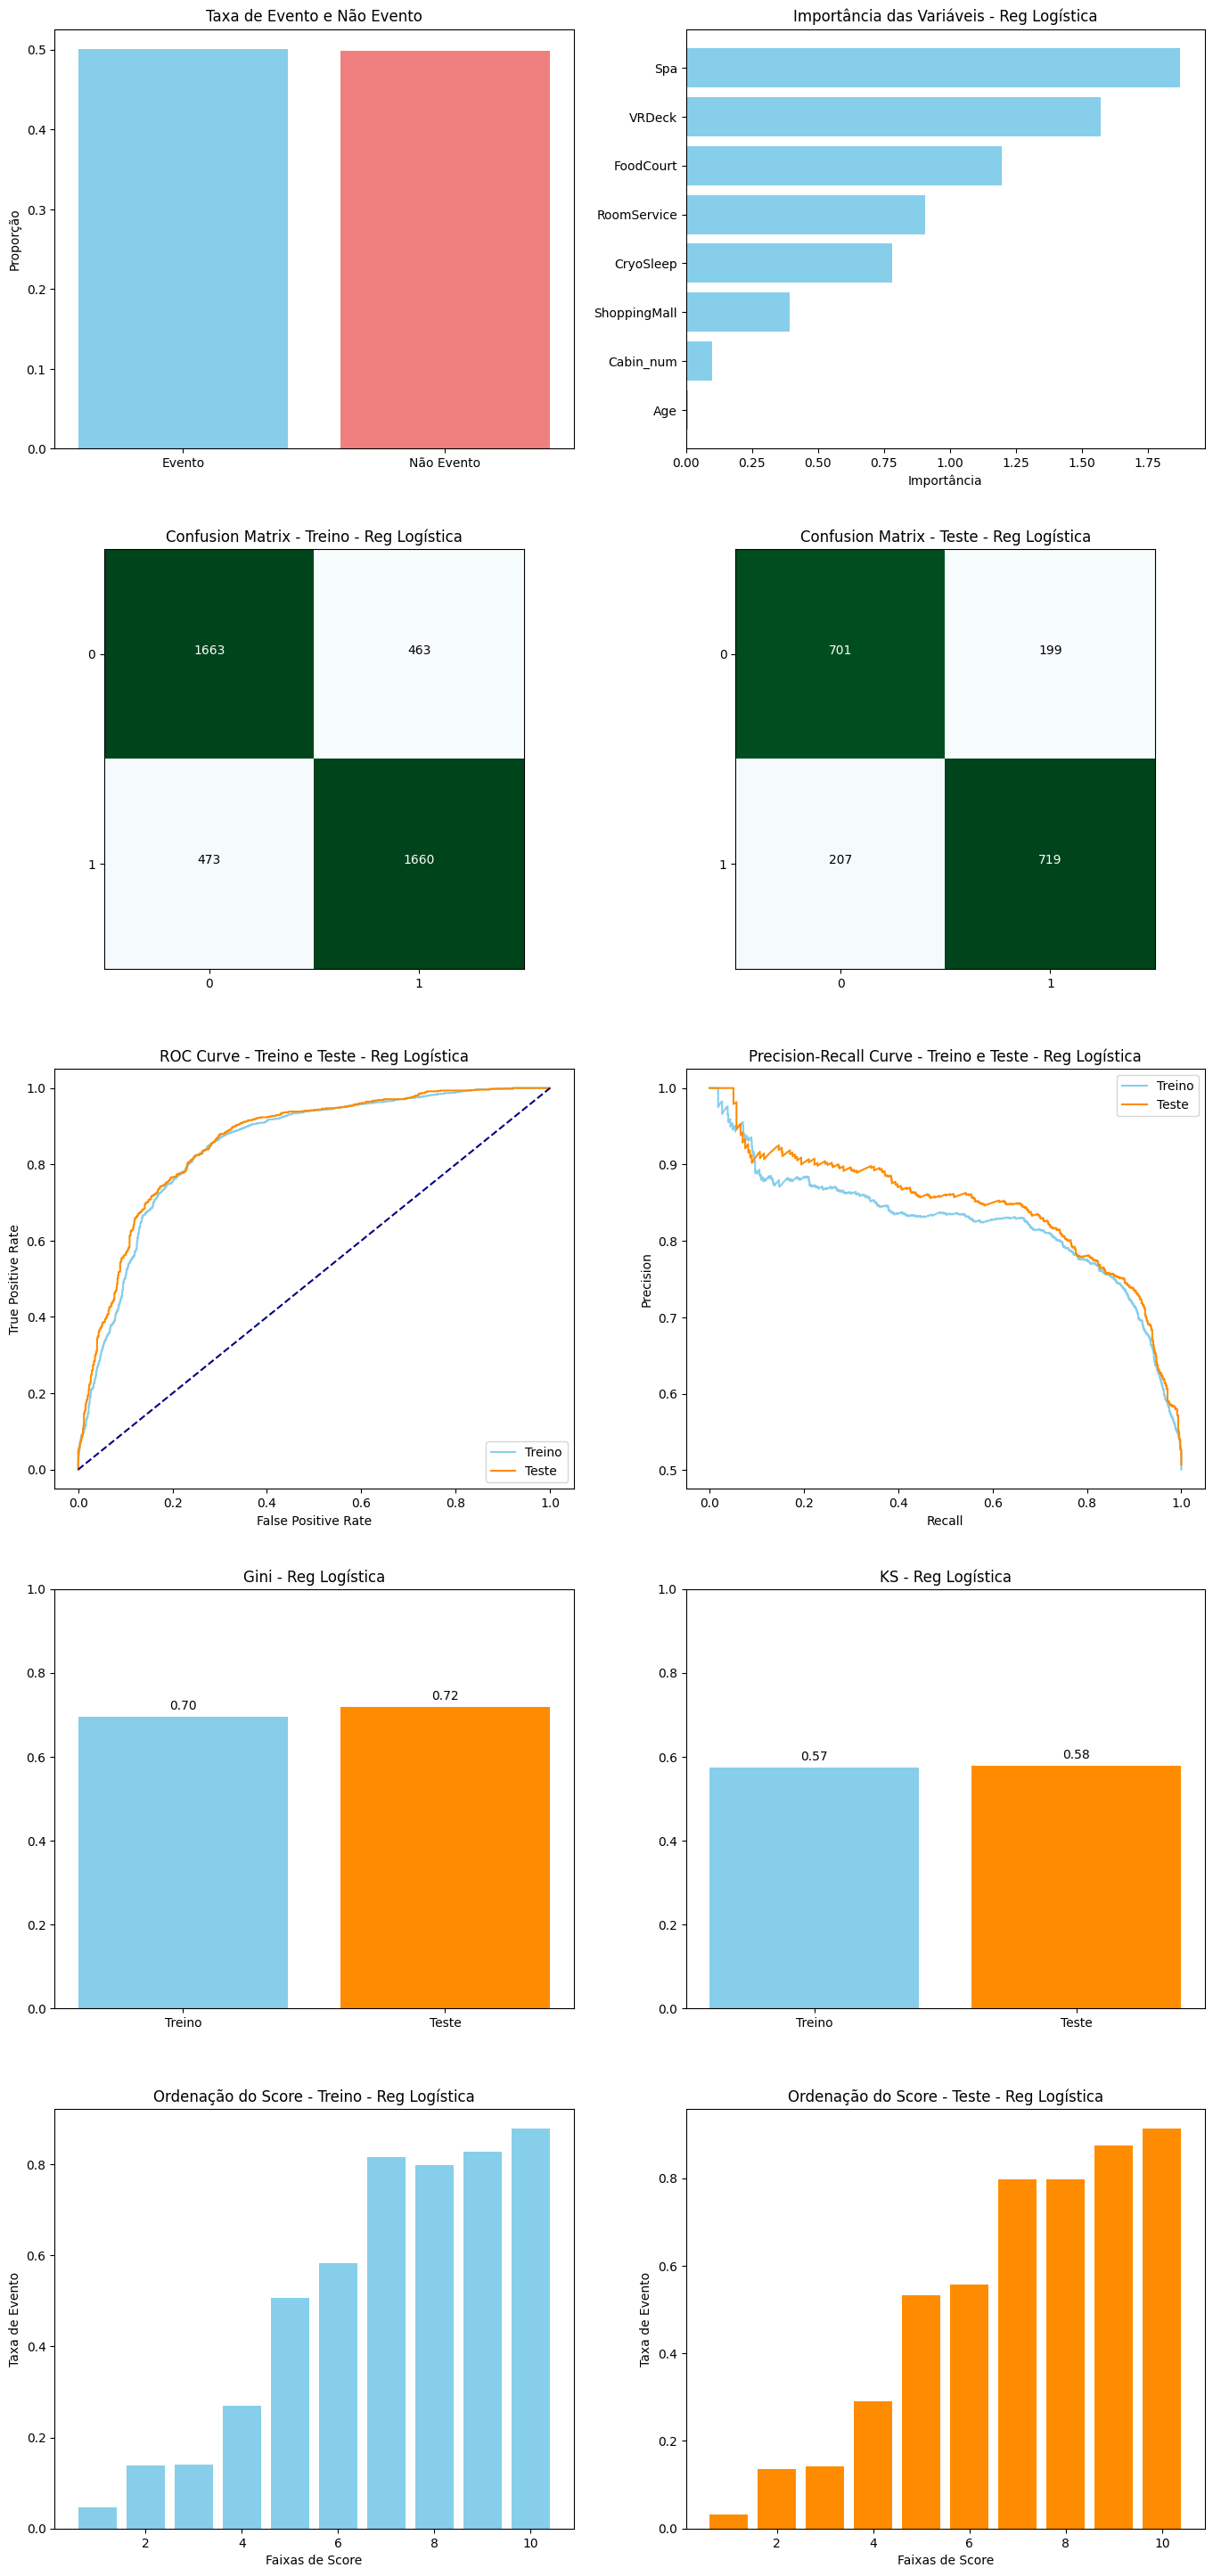

In [59]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, model_sgs,nm_modelo='Reg Logística')

### **Random Forest Classifier**

    'n_estimators': [10, 50, 100],
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 5],
    'min_samples_split': [ 0.001, 0.01],
    'min_samples_leaf': [0.01, 0.001, 0.0001],
    'bootstrap': [True, False],
    #'max_features': ['auto', 'sqrt', 'log2']

In [60]:
from sklearn.ensemble import RandomForestClassifier

# definindo o modelo
model = RandomForestClassifier()

# n_estimators=100,  # Número de árvores na floresta.
# criterion='gini',  # Função para medir a qualidade de uma divisão ("gini" ou "entropy").
# max_depth=None,  # Profundidade máxima das árvores. None significa que os nós são expandidos até ficarem puros.
# min_samples_split=2,  # Número mínimo de amostras necessárias para dividir um nó interno.
# min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
# min_weight_fraction_leaf=0.0,  # Fração mínima ponderada da soma total de pesos necessária para estar em um nó folha.
# max_features='auto',  # Número de características a considerar ao procurar a melhor divisão.
# max_leaf_nodes=None,  # Número máximo de nós folha.
# min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir a uma diminuição da impureza maior ou igual a este valor.
# bootstrap=True,  # Se as amostras de bootstrap são usadas ao construir árvores.
# oob_score=False,  # Se usar amostras out-of-bag para estimar a precisão generalizada.
# n_jobs=None,  # Número de jobs a serem executados em paralelo para ajuste e previsão. -1 significa usar todos os processadores.
# random_state=None,  # Controla a aleatoriedade do bootstrap e da seleção de features.
# verbose=0,  # Controla a verbosidade do processo de treinamento.
# warm_start=False,  # Reutiliza a solução da chamada anterior para ajustar e adicionar mais estimadores ao ensemble.
# class_weight=None  # Pesos associados às classes. Pode ser "balanced", "balanced_subsample" ou um dicionário com os pesos.


# definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [50, 87,  100],
    'criterion':['gini','entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [ 0.001, 0.01, 1],
    'min_samples_leaf': [0.01, 0.001, 1 , 6],
    'bootstrap': [True, False],
    'max_features': ['sqrt']
}

# definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='accuracy',  # 'roc_auc' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# medindo o tempo de execução
start_time = time.time()

# treinando o modelo com o grid search
grid.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

mins, secs = divmod(elapsed_time, 60)

# exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor Accuracy: ", grid.best_score_)

# utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)
predprob = grid.best_estimator_.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print('Accuracy no teste -->', round(acc, 4))

print(f"Tempo de execução: {int(mins)} minutos e {int(secs)} segundos")

best_model_rf = grid.best_estimator_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Melhores Parâmetros:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.01, 'n_estimators': 50}
Melhor Accuracy:  0.7943204073638856
Accuracy no teste --> 0.8007
Tempo de execução: 10 minutos e 3 segundos


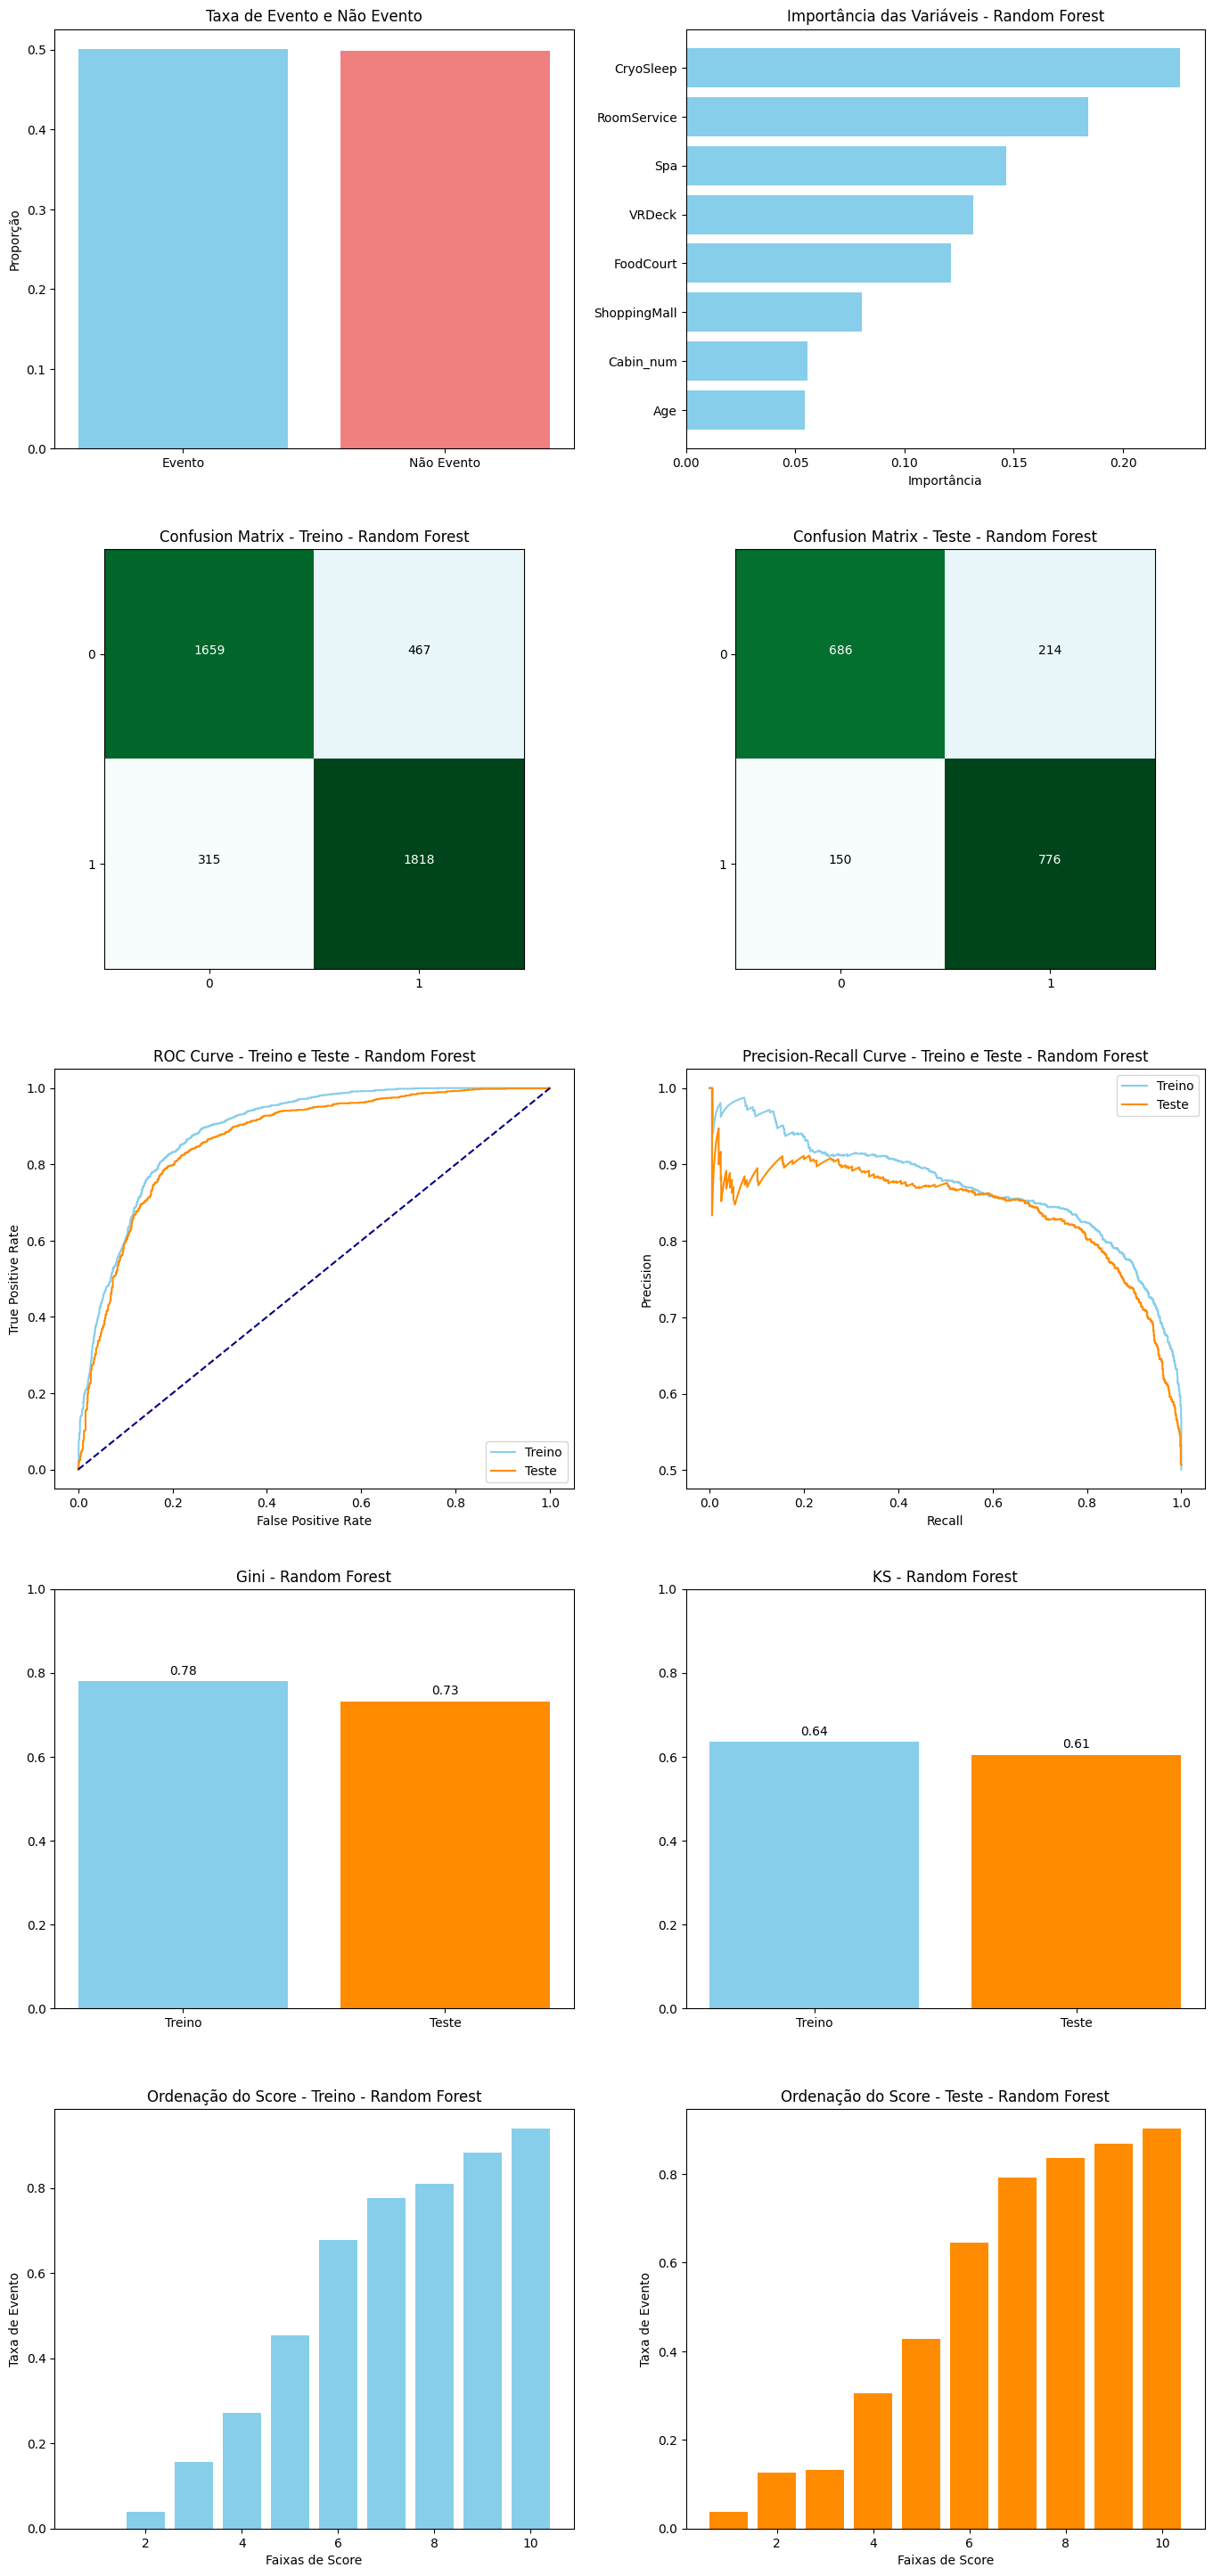

In [61]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, best_model_rf,nm_modelo='Random Forest')

### **LightGBM**

In [62]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Definindo o modelo
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=100,
    random_state=42,
    verbose=-1,
    n_jobs=-1
)


# Definindo os parâmetros para o grid search
param_grid = {
    'max_depth' : [1, 3, 5],
    'num_leaves': [3, 5, 15],
    'min_data_in_leaf': [10, 30, 50],
    'lambda_l1': [1, 1.5],
    'lambda_l2': [0.5, 1, 1.5],
    'learning_rate':[0.1, 0.01]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='accuracy',  # 'roc_auc' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# medindo o tempo de execução
start_time = time.time()

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

mins, secs = divmod(elapsed_time, 60)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor Accuracy: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)
predprob = grid.best_estimator_.predict_proba(X_test)

acc = accuracy_score(y_test, predictions)
print('Accuracy no teste -->', round(acc, 4))

print(f"Tempo de execução: {int(mins)} minutos e {int(secs)} segundos")

best_model_lightgbm = grid.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores Parâmetros:  {'lambda_l1': 1.5, 'lambda_l2': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 30, 'num_leaves': 3}
Melhor Accuracy:  0.7976067923404114
Accuracy no teste --> 0.8018
Tempo de execução: 12 minutos e 19 segundos


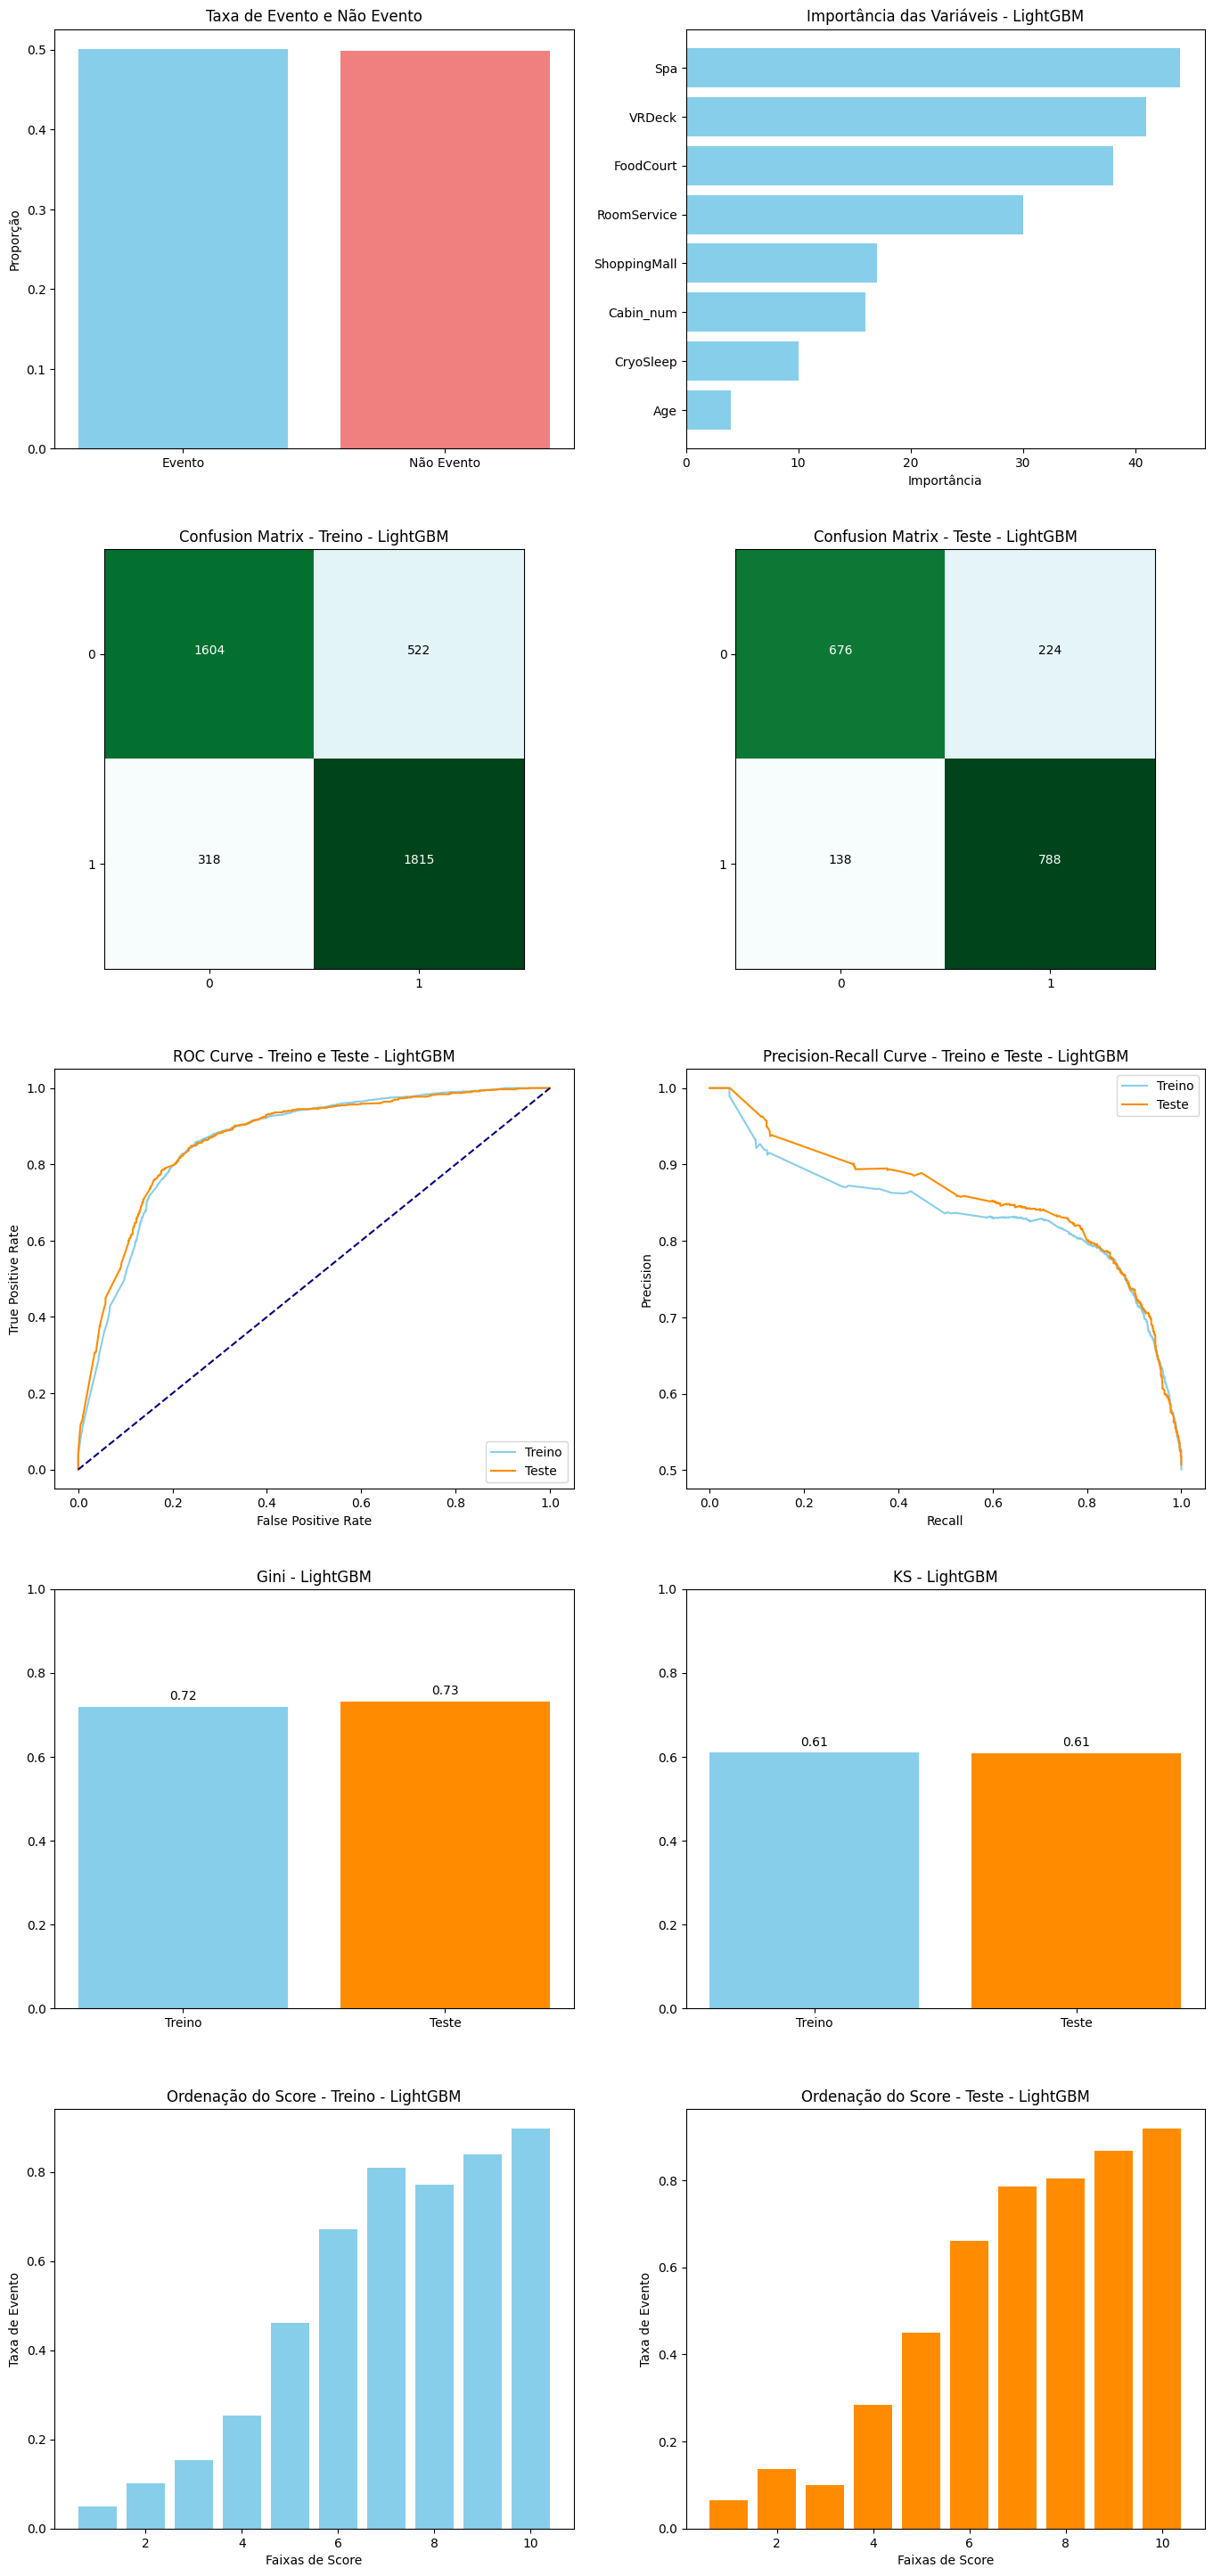

In [63]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, best_model_lightgbm,nm_modelo='LightGBM')

### **XGBooost**

In [64]:
import xgboost as xgb

# Definir o modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


# Definindo os parâmetros para o grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [0.5, 1, 3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1],
    'n_estimators': [100, 200]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='accuracy',  # 'roc_auc' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)


# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor Accuracy: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, predictions)
print('Accuracy no teste -->', round(acc, 4))

best_model_xgbm = grid.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores Parâmetros:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Melhor Accuracy:  0.7957283063835422
Accuracy no teste --> 0.8012


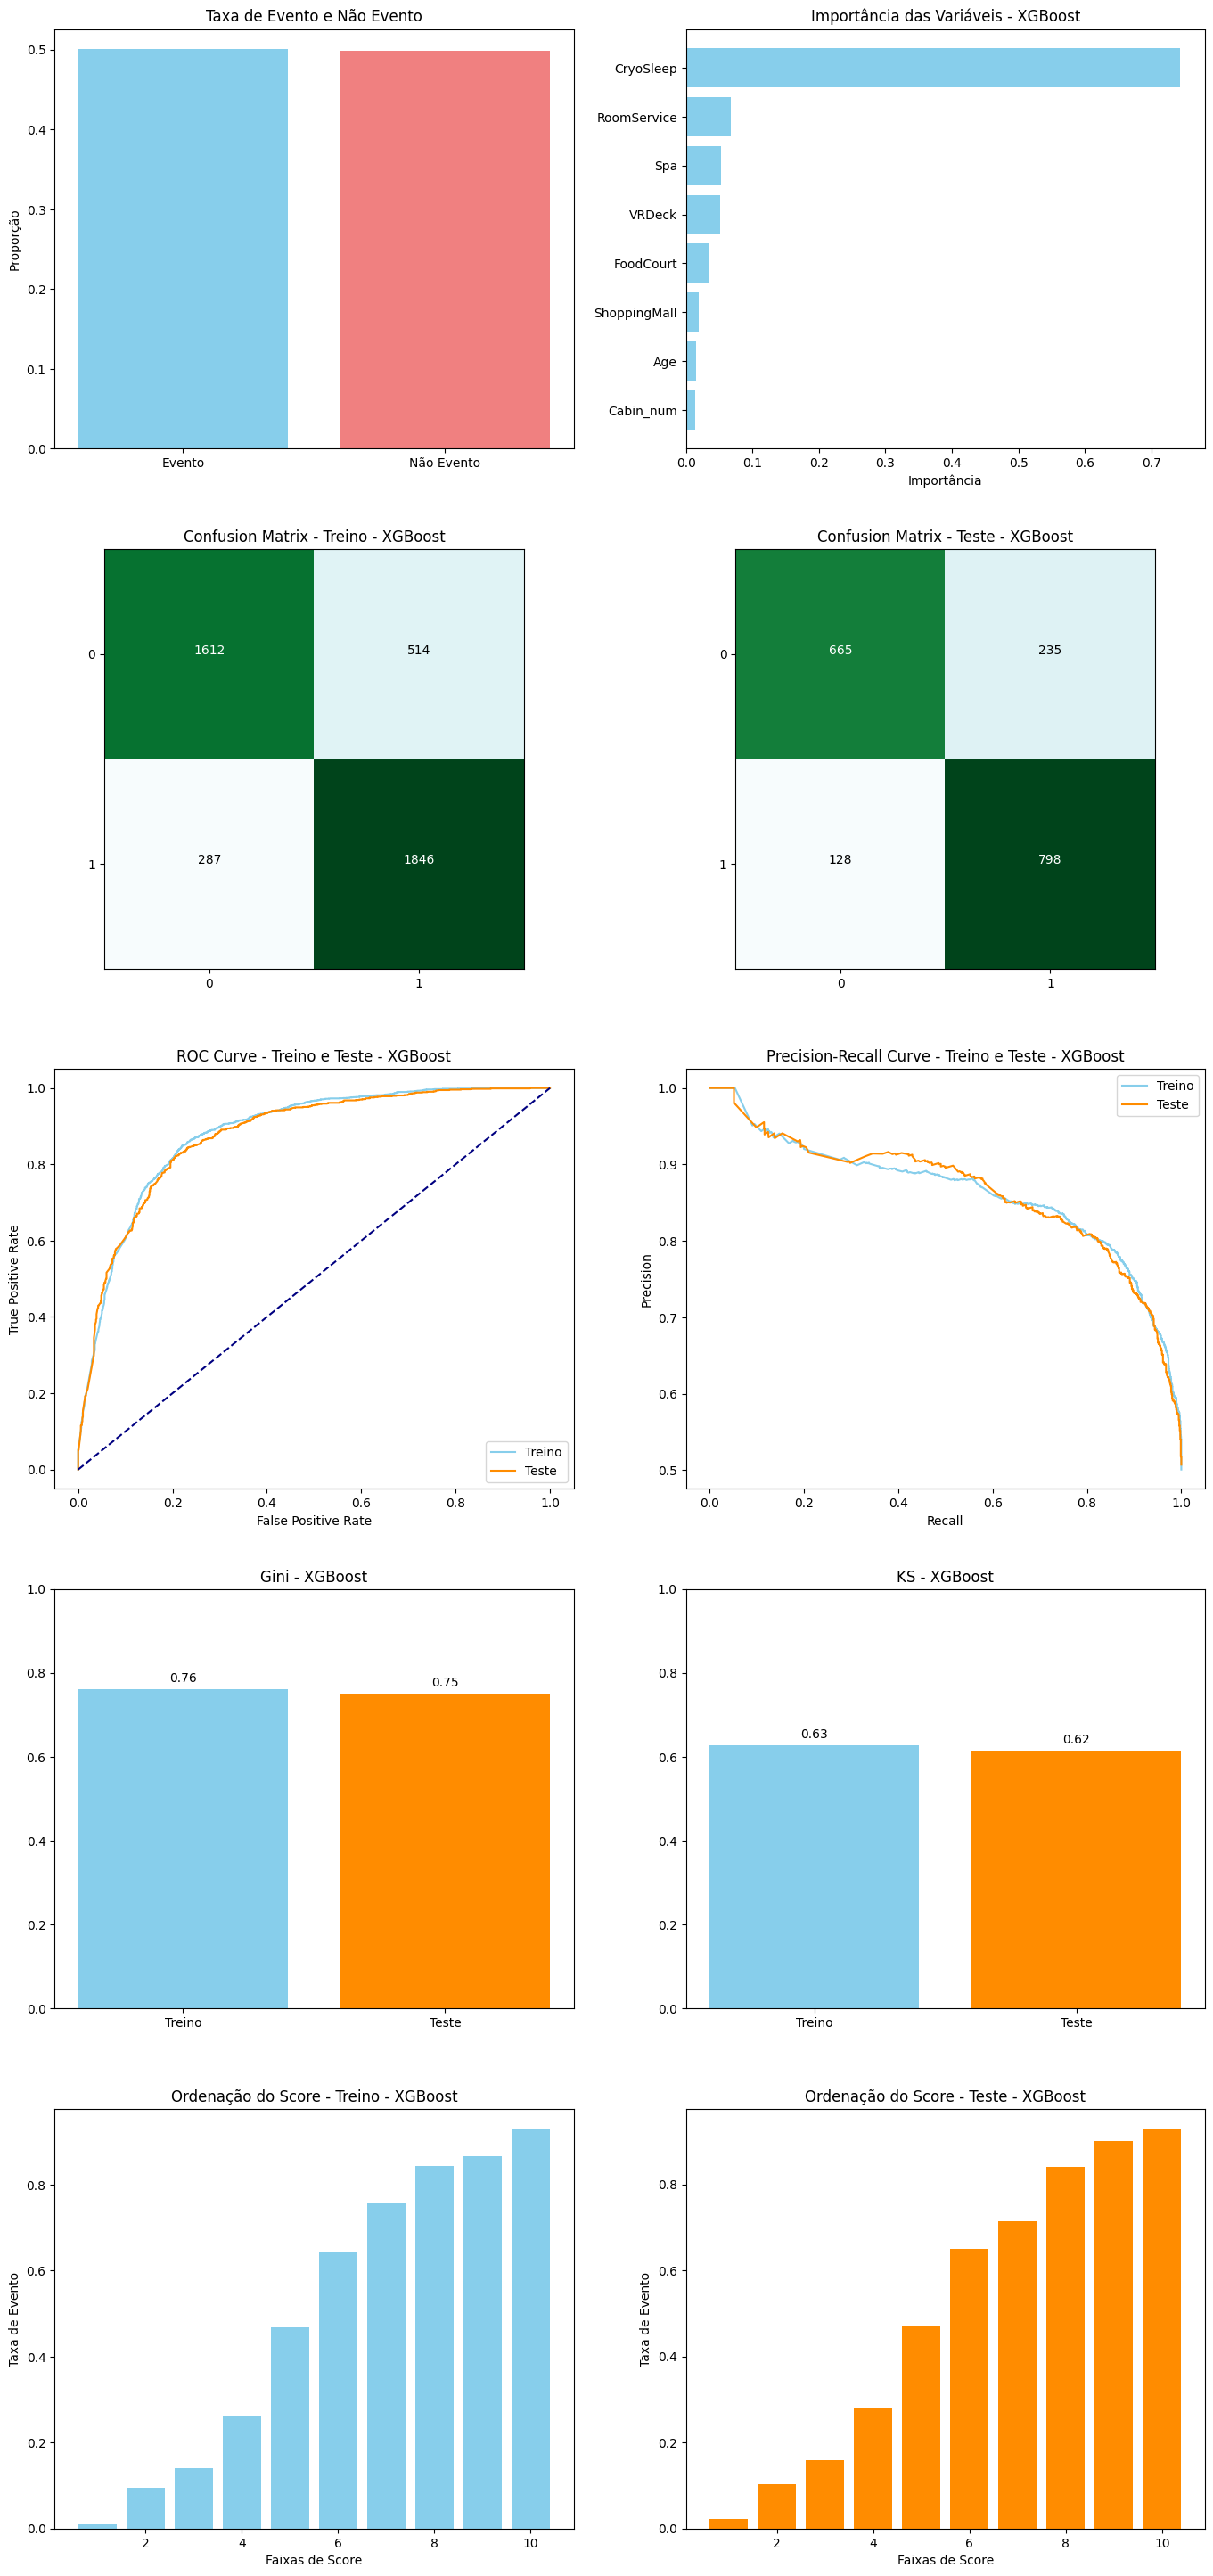

In [65]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, best_model_xgbm,nm_modelo='XGBoost')

### **Stacking de modelos**

In [66]:
from sklearn.ensemble import StackingClassifier

# Definir os modelos de base
base_learners = [
    ('dt', best_model_dt),
    ('rl', best_model_rl),
    ('rf', best_model_rf),
    ('lgbm', best_model_lightgbm),
    ('xgbm', best_model_xgbm),
]

# Definir o meta-modelo
meta_learner = lgb.LGBMClassifier(random_state=42)

# Construir o modelo de stacking
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5, n_jobs=-1)

# Treinar o modelo de stacking
stacking_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = stacking_model.predict(X_test)

# Calcular e exibir a acurácia
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo stacking no teste: {acc:.4f}')

stacking_model

Acurácia do modelo stacking no teste: 0.7990


StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_leaf=0.008,
                                                       min_samples_split=0.0005,
                                                       random_state=42)),
                               ('rl',
                                LogisticRegression(C=2.0,
                                                   class_weight='balanced',
                                                   penalty='l1',
                                                   solver='liblinear',
                                                   tol=1e-06)),
                               ('rf',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=0.01,
                                                       n_estimators=50)),
                               ('lgbm',
                                LGBMClassifier(lam...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LGBMClassifier(random_state=42), n_jobs=-1)

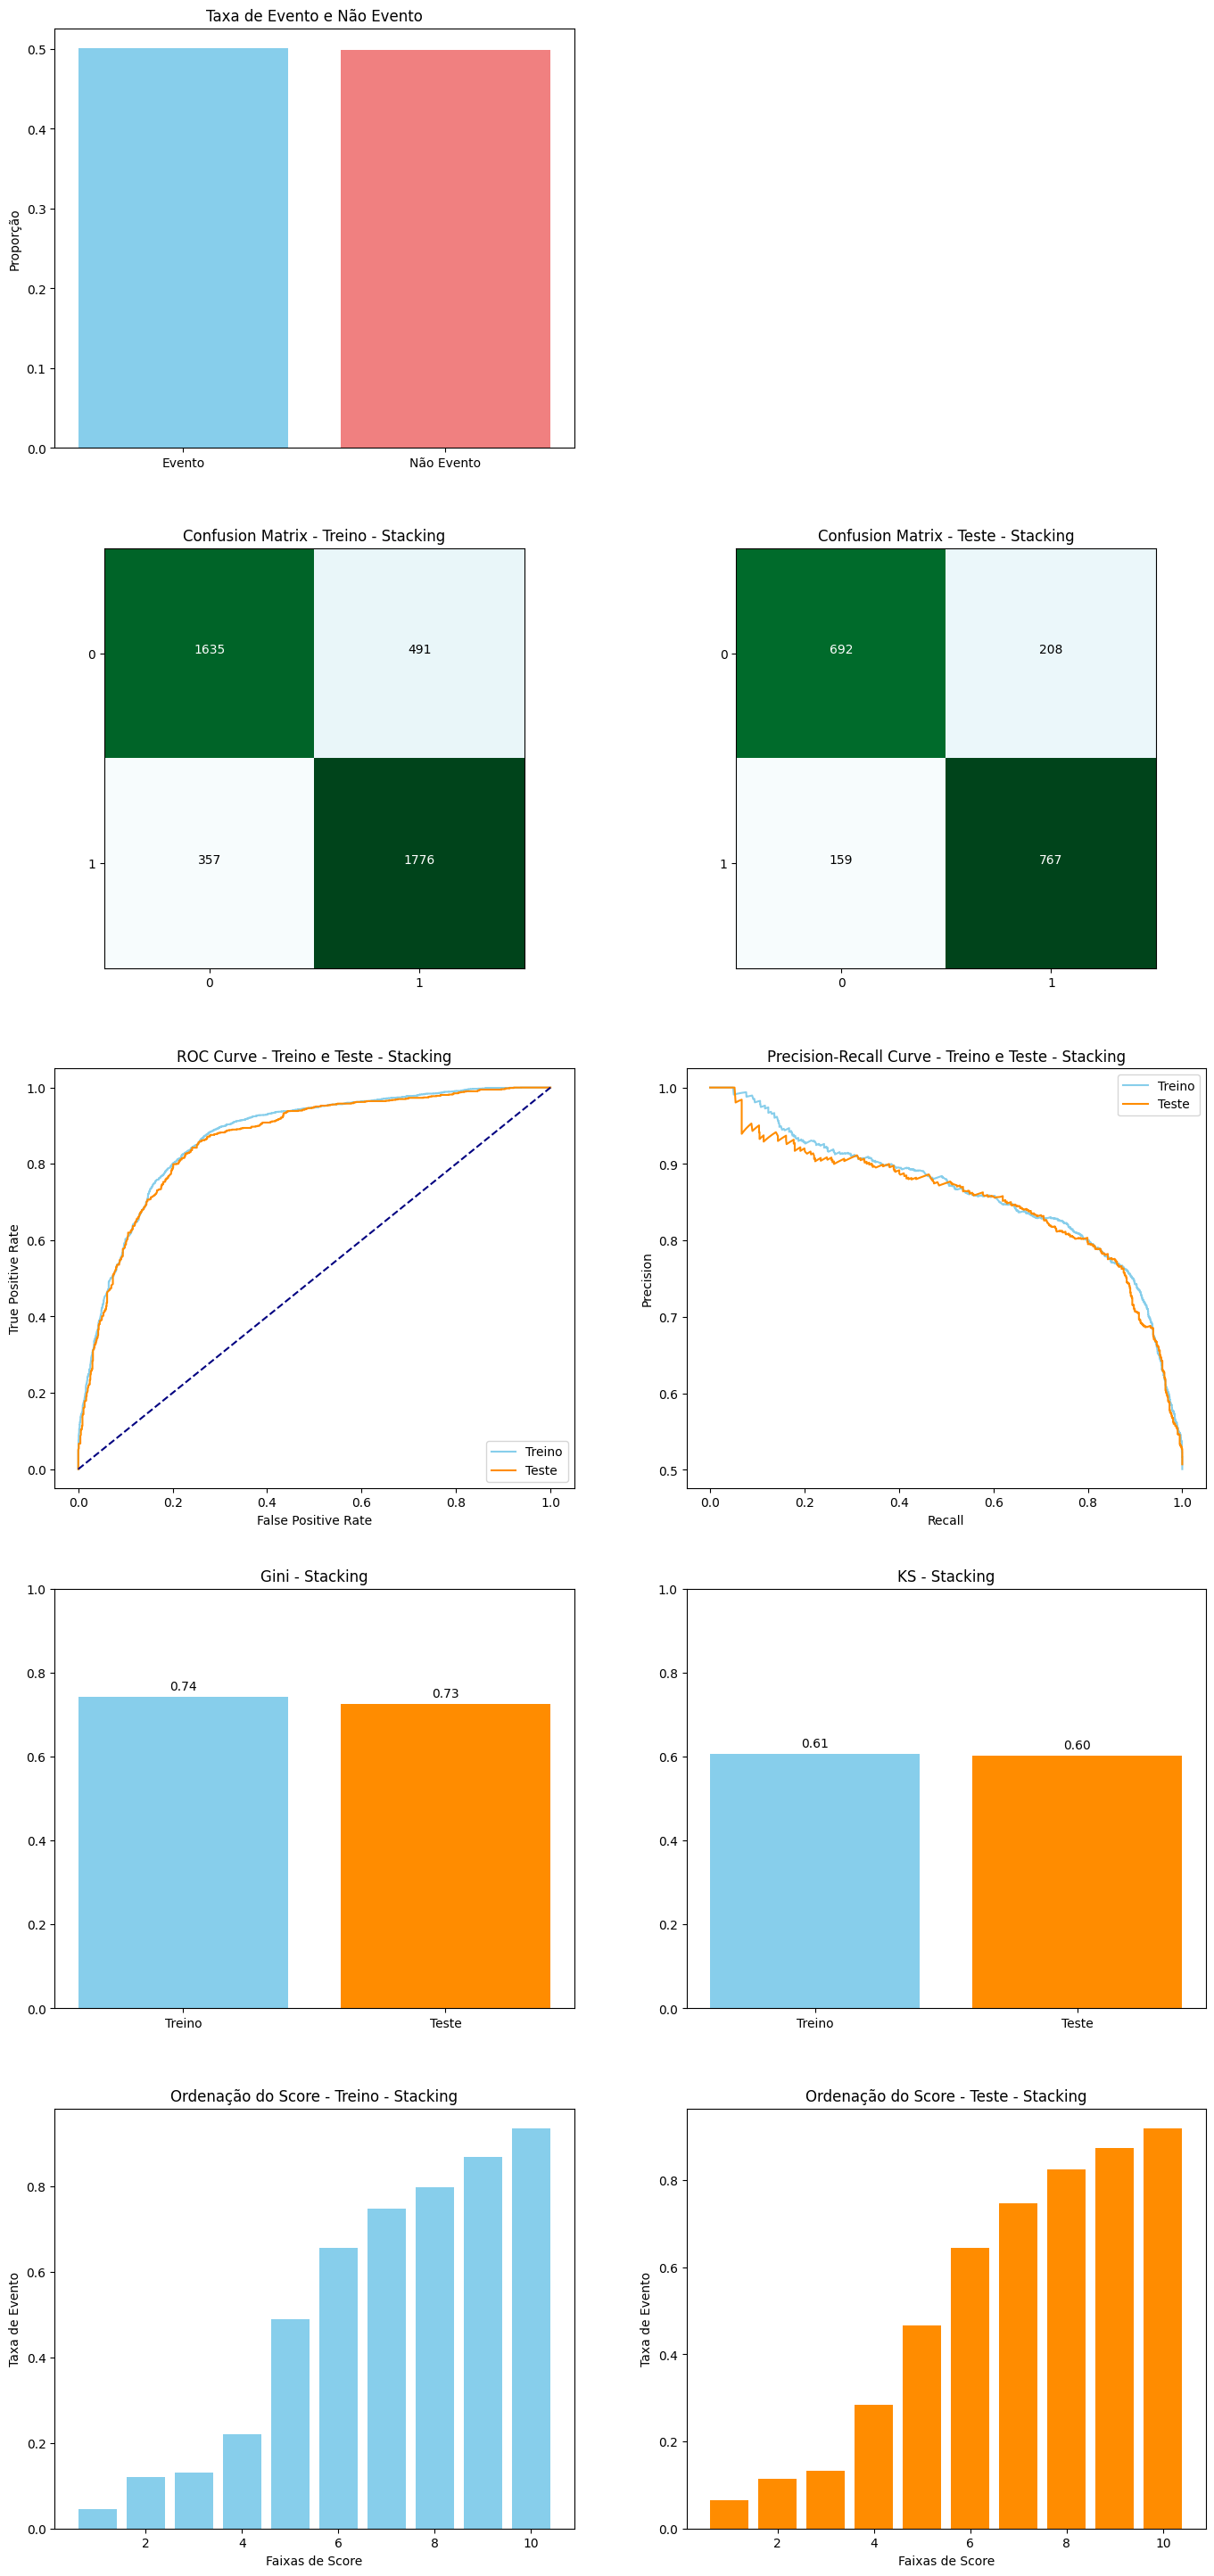

In [67]:
pod.avaliar_modelo(X_train, y_train, X_test, y_test, stacking_model,nm_modelo='Stacking')

In [68]:
# salvando os modelos
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_dt.pkl', 'wb') as file:
  pickle.dump(best_model_dt, file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_rl.pkl', 'wb') as file:
  pickle.dump(best_model_rl, file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_rf.pkl', 'wb') as file:
  pickle.dump(best_model_rf, file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_lightgbm.pkl', 'wb') as file:
  pickle.dump(best_model_lightgbm, file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_xgbm.pkl', 'wb') as file:
  pickle.dump(best_model_xgbm, file)

In [69]:
# Lendo os modelos treinados
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_dt.pkl', 'rb') as file:
    loaded_model_dt = pickle.load(file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_rl.pkl', 'rb') as file:
    loaded_model_rl = pickle.load(file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_rf.pkl', 'rb') as file:
    loaded_model_rf = pickle.load(file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_lightgbm.pkl', 'rb') as file:
    loaded_model_lightgbm = pickle.load(file)

with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_xgbm.pkl', 'rb') as file:
    loaded_model_xgbm = pickle.load(file)

loaded_model_lightgbm

LGBMClassifier(lambda_l1=1.5, lambda_l2=1, max_depth=3, min_data_in_leaf=30,
               n_jobs=-1, num_leaves=3, objective='binary', random_state=42,
               verbose=-1)

In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_models(X_train, y_train, X_test, y_test, models):
    metrics = []
    for name, model in models.items():
        # Prever os rótulos para os conjuntos de treino e teste
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        # Calcular as métricas
        accuracy = accuracy_score(y_test, test_preds)
        precision = precision_score(y_test, test_preds)
        recall = recall_score(y_test, test_preds)
        f1 = f1_score(y_test, test_preds)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Supondo que é um problema de classificação binária
        Gini = 2*auc - 1

        # Adicionar ao array de métricas
        metrics.append({
            'Model': name,
            # 'Train Accuracy': accuracy_score(y_train, train_preds),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': auc,
            'Gini':Gini
        })

    # Converter o array de métricas em um DataFrame
    metrics_df = pd.DataFrame(metrics)

    # Ordenar o DataFrame pela metrica Gini
    metrics_df_sorted = metrics_df.sort_values(by='Accuracy',ascending=False)

    # Função para destacar o maior valor em azul claro
    def highlight_max(s):
      is_max = s == s.max()
      return ['background-color: yellow' if v else '' for v in is_max]

    # Aplicando o estilo na coluna 'A'
    metrics_df_sorted = metrics_df_sorted.style.apply(highlight_max, subset=['Accuracy'])


    return metrics_df_sorted

models = {
          'Decision Tree': loaded_model_dt,
          'Regressão Logística': loaded_model_rl,
          'Random Forest': loaded_model_rf,
          'LightGBM': loaded_model_lightgbm,
          'XGBoost': loaded_model_xgbm,
          }

# Chamar a função com os datasets de treino e teste e os modelos carregados
metrics_df = evaluate_models(X_train, y_train, X_test, y_test, models)

In [71]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Gini
3,LightGBM,0.801752,0.778656,0.850972,0.813209,0.866072,0.732144
4,XGBoost,0.801205,0.772507,0.861771,0.814701,0.875617,0.751235
2,Random Forest,0.800657,0.783838,0.838013,0.810021,0.866186,0.732371
0,Decision Tree,0.782585,0.765829,0.822894,0.793337,0.844174,0.688348
1,Regressão Logística,0.778204,0.783460,0.777538,0.780488,0.859712,0.719424


# **Escoragem**

In [89]:
df_train_000 = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/train.csv')
df_train_000.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [90]:
df_test_000 = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/test.csv')
df_test_000.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [91]:
print(df_train_000.shape)
print(df_test_000.shape)

(8693, 14)
(4277, 13)


In [92]:
df_train_001 = df_train_000.copy()
df_test_001 = df_test_000.copy()

#### **Preparando as colunas**

In [93]:
# alterando na base de treino
df_train_001[['VIP','CryoSleep','Transported']] = df_train_001[['VIP','CryoSleep','Transported']].replace({True: 'True', False: 'False'})
df_train_001[['VIP','CryoSleep','Transported']] = df_train_001[['VIP','CryoSleep','Transported']].replace({'True': 1, 'False': 0})
df_train_001[['VIP','CryoSleep','Transported']] = df_train_001[['VIP','CryoSleep','Transported']].fillna(value=0)
df_train_001[['VIP','CryoSleep','Transported']] = df_train_001[['VIP','CryoSleep','Transported']].astype(int)

# alterando na base de treino
df_test_001[['VIP','CryoSleep']] = df_test_001[['VIP','CryoSleep']].replace({True: 'True', False: 'False'})
df_test_001[['VIP','CryoSleep']] = df_test_001[['VIP','CryoSleep']].replace({'True': 1, 'False': 0})
df_test_001[['VIP','CryoSleep']] = df_test_001[['VIP','CryoSleep']].fillna(value=0)
df_test_001[['VIP','CryoSleep']] = df_test_001[['VIP','CryoSleep']].astype(int)

In [94]:
# base treino
# dividindo a coluna Cabin
df_train_001[["Deck", "Cabin_num", "Side"]] = df_train_001["Cabin"].str.split("/", expand=True)

# removendo a coluna após a divisão
df_train_001 = df_train_001.drop("Cabin", axis=1)

# base test
# dividindo a coluna Cabin
df_test_001[["Deck", "Cabin_num", "Side"]] = df_test_001["Cabin"].str.split("/", expand=True)

# removendo a coluna após a divisão
df_test_001 = df_test_001.drop("Cabin", axis=1)

In [96]:
print(df_train_001.shape)
print(df_test_001.shape)

(8693, 16)
(4277, 15)


In [97]:
# preenchendo os valores nulos da coluna "Cabin_num" na base de treino
df_train_001[['Cabin_num']] = df_train_001[['Cabin_num']].fillna(value=0)
df_train_001[['Cabin_num']] = df_train_001[['Cabin_num']].astype(int)

# preenchendo os valores nulos da coluna "Cabin_num" na base de teste
df_test_001[['Cabin_num']] = df_test_001[['Cabin_num']].fillna(value=0)
df_test_001[['Cabin_num']] = df_test_001[['Cabin_num']].astype(int)

In [98]:
df_train_002 = df_train_001.drop(columns = ['PassengerId', 'Name', 'Transported'])
df_test_002 = df_test_001.drop(columns = ['PassengerId', 'Name'])

df_train_002.shape, df_test_002.shape

((8693, 13), (4277, 13))

#### **Substituindo os nulos**

In [101]:
# substituindo os valores nulos pela média nas colunas numéricas e por "Unknown" nas colunas categóricas
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)

df_train_002 = pod_custom_fillna_prod(df_train_002,loaded_means)
print(df_train_002.shape)

df_test_002 = pod_custom_fillna_prod(df_test_002,loaded_means)
print(df_test_002.shape)

(8693, 13)
(4277, 13)


#### **Padronizando os dados**

In [102]:
# Base treino
# Carregar o scaler
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Lista de colunas padronizadas
cols_para_padronizar = [col for col in df_train_002.columns if col in loaded_scaler.feature_names_in_]

# Aplicar transformação apenas nas colunas numéricas selecionadas
df_train_002_scaled = loaded_scaler.transform(df_train_002[cols_para_padronizar])

# Substituir as colunas escaladas na base original
df_train_003 = df_train_002.copy()
df_train_003[cols_para_padronizar] = df_train_002_scaled

df_train_003.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,Europa,-0.72066,TRAPPIST-1e,0.706913,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,B,-1.152998,P
1,Earth,-0.72066,TRAPPIST-1e,-0.338156,-0.152896,-0.174549,-0.288447,-0.240014,0.208155,-0.226246,F,-1.152998,S
2,Europa,-0.72066,TRAPPIST-1e,2.030668,6.540411,-0.271139,1.939004,-0.280573,5.723559,-0.221979,A,-1.152998,S
3,Europa,-0.72066,TRAPPIST-1e,0.288886,-0.152896,-0.334068,0.507116,0.321326,2.694828,-0.099091,A,-1.152998,S
4,Earth,-0.72066,TRAPPIST-1e,-0.895526,-0.152896,0.109366,-0.250355,-0.035595,0.222467,-0.262089,F,-1.151050,S


In [103]:
# Base test
# Lista de colunas padronizadas
cols_para_padronizar = [col for col in df_test_002.columns if col in loaded_scaler.feature_names_in_]

# Aplicar transformação apenas nas colunas numéricas selecionadas
df_test_002_scaled = loaded_scaler.transform(df_test_002[cols_para_padronizar])

# Substituir as colunas escaladas na base original
df_test_003 = df_test_002.copy()
df_test_003[cols_para_padronizar] = df_test_002_scaled

df_test_003.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,Earth,1.387617,TRAPPIST-1e,-0.129142,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,G,-1.147155,S
1,Earth,-0.720660,TRAPPIST-1e,-0.686513,-0.152896,-0.334068,-0.288447,-0.280573,2.242218,-0.263795,F,-1.145207,S
2,Europa,1.387617,55 Cancri e,0.149543,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,C,-1.152998,S
3,Europa,-0.720660,TRAPPIST-1e,0.637242,-0.152896,-0.334068,3.859845,-0.280573,-0.121016,0.235439,C,-1.151050,S
4,Earth,-0.720660,TRAPPIST-1e,-0.616841,-0.152896,-0.319434,-0.294067,0.749632,-0.282918,-0.263795,F,-1.143260,S


In [105]:
print(df_train_003.shape)
print(df_test_003.shape)

(8693, 13)
(4277, 13)


#### **Aplicando Label Encoder**

In [106]:
df_test_004 = df_test_003.copy()
df_train_004 = df_train_003.copy()

In [107]:
# carregando os encoders e a lista de colunas
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_labelenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# aplicando na base treino
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        df_train_004[col] = loaded_encoders[col].transform(df_train_004[col])

# aplicando na base test
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        df_test_004[col] = loaded_encoders[col].transform(df_test_004[col])

In [108]:
print(df_train_004.shape)
print(df_test_004.shape)

(8693, 13)
(4277, 13)


#### **Aplicando One Hot Encoder**

In [109]:
df_train_005 = df_train_004.copy()
df_test_005 = df_test_004.copy()

In [110]:
# carregando o encoder na tabela treino
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_onehotenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']


encoded_data_train = loaded_encoder.transform(df_train_005[loaded_columns])
encoded_cols_train = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoded_cols_train, index=df_train_005.index)

df_train_005 = pd.concat([df_train_005.drop(loaded_columns, axis=1), encoded_df_train], axis=1)

In [111]:
# carregando o encoder na tabela test
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_onehotenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']


encoded_data_test = loaded_encoder.transform(df_test_005[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df_test_005.index)

df_test_005 = pd.concat([df_test_005.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

In [112]:
df_train_005.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,-0.72066,0.706913,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.72066,-0.338156,-0.152896,-0.174549,-0.288447,-0.240014,0.208155,-0.226246,-1.152998,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.72066,2.030668,6.540411,-0.271139,1.939004,-0.280573,5.723559,-0.221979,-1.152998,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.72066,0.288886,-0.152896,-0.334068,0.507116,0.321326,2.694828,-0.099091,-1.152998,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.72066,-0.895526,-0.152896,0.109366,-0.250355,-0.035595,0.222467,-0.262089,-1.151050,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [113]:
df_test_005.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,1.387617,-0.129142,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.147155,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.720660,-0.686513,-0.152896,-0.334068,-0.288447,-0.280573,2.242218,-0.263795,-1.145207,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.387617,0.149543,-0.152896,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.720660,0.637242,-0.152896,-0.334068,3.859845,-0.280573,-0.121016,0.235439,-1.151050,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.720660,-0.616841,-0.152896,-0.319434,-0.294067,0.749632,-0.282918,-0.263795,-1.143260,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [114]:
print(df_train_005.shape)
print(df_test_005.shape)

(8693, 25)
(4277, 25)


#### **Aplicando Seleção de Variáveis**

In [118]:
# carregando a lista de variáveis do arquivo .pkl
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']


In [119]:
# criando os dfs apenas com as variáveis selecionadas
abt_train = df_train_005[loaded_lista]
abt_test = df_test_005[loaded_lista]

In [120]:
abt_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
0,-0.72066,0.706913,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998
1,-0.72066,-0.338156,-0.174549,-0.288447,-0.240014,0.208155,-0.226246,-1.152998
2,-0.72066,2.030668,-0.271139,1.939004,-0.280573,5.723559,-0.221979,-1.152998
3,-0.72066,0.288886,-0.334068,0.507116,0.321326,2.694828,-0.099091,-1.152998
4,-0.72066,-0.895526,0.109366,-0.250355,-0.035595,0.222467,-0.262089,-1.151050


In [121]:
abt_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
0,1.387617,-0.129142,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.147155
1,-0.720660,-0.686513,-0.334068,-0.288447,-0.280573,2.242218,-0.263795,-1.145207
2,1.387617,0.149543,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998
3,-0.720660,0.637242,-0.334068,3.859845,-0.280573,-0.121016,0.235439,-1.151050
4,-0.720660,-0.616841,-0.319434,-0.294067,0.749632,-0.282918,-0.263795,-1.143260


#### **Escolhendo o modelo**

In [122]:
# Carregando modelo que apresentou melhor desempenho
with open('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/best_model_lightgbm.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

loaded_model

LGBMClassifier(lambda_l1=1.5, lambda_l2=1, max_depth=3, min_data_in_leaf=30,
               n_jobs=-1, num_leaves=3, objective='binary', random_state=42,
               verbose=-1)

In [123]:
# Escorando base de treino
predprob = loaded_model.predict_proba(abt_train)
predict = loaded_model.predict(abt_train)
abt_train['score_1']=predprob[:,1]
abt_train['class']=predict

# Escorando base de teste
predprob = loaded_model.predict_proba(abt_test)
predict = loaded_model.predict(abt_test)
abt_test['score_1']=predprob[:,1]
abt_test['class']=predict

In [124]:
# adicionando as colunas de id e target retiradas
abt_train = abt_train.merge(df_train_000[['PassengerId','Transported']], left_index=True, right_index=True, how='inner')
abt_test = abt_test.merge(df_test_000[['PassengerId']], left_index=True, right_index=True, how='inner')

In [125]:
abt_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,score_1,class,PassengerId,Transported
0,-0.72066,0.706913,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998,0.601568,1,0001_01,False
1,-0.72066,-0.338156,-0.174549,-0.288447,-0.240014,0.208155,-0.226246,-1.152998,0.219821,0,0002_01,True
2,-0.72066,2.030668,-0.271139,1.939004,-0.280573,5.723559,-0.221979,-1.152998,0.165873,0,0003_01,False
3,-0.72066,0.288886,-0.334068,0.507116,0.321326,2.694828,-0.099091,-1.152998,0.092020,0,0003_02,False
4,-0.72066,-0.895526,0.109366,-0.250355,-0.035595,0.222467,-0.262089,-1.151050,0.169378,0,0004_01,True


In [126]:
abt_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,score_1,class,PassengerId
0,1.387617,-0.129142,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.147155,0.819400,1,0013_01
1,-0.720660,-0.686513,-0.334068,-0.288447,-0.280573,2.242218,-0.263795,-1.145207,0.158371,0,0018_01
2,1.387617,0.149543,-0.334068,-0.294067,-0.280573,-0.282918,-0.263795,-1.152998,0.819400,1,0019_01
3,-0.720660,0.637242,-0.334068,3.859845,-0.280573,-0.121016,0.235439,-1.151050,0.875139,1,0021_01
4,-0.720660,-0.616841,-0.319434,-0.294067,0.749632,-0.282918,-0.263795,-1.143260,0.601331,1,0023_01


In [129]:
print(abt_train.shape)
print(abt_test.shape)

(8693, 12)
(4277, 11)


In [131]:
# verificando o formato da amostra de envio para o kaggle
df_sub_example = pd.read_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/sample_submission.csv')
df_sub_example.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [134]:
df_sub_example.dtypes

,0
PassengerId,object
Transported,bool


In [137]:
abt_sub = abt_test[['PassengerId','class']]
abt_sub.rename(columns={'class':'Transported'}, inplace=True)
abt_sub['Transported'] = abt_sub['Transported'].replace({1: True, 0: False})
abt_sub['Transported'] = abt_sub['Transported'].astype(bool)
abt_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [138]:
abt_sub.shape

(4277, 2)

In [139]:
# salvando o arquivo
abt_sub.to_csv('/content/drive/MyDrive/5 - Kaggle Competitions/Spaceship_Titanic/submission_001.csv', index=False)

**Retorno da pontuação Kaggle**

- Acurácia (Leaderboard): 0.79401
<br><br>

**Aprendizados e reflexões para as próximas versões:**

- Modelos simples, bem ajustados e com bons dados, superaram abordagens mais complexas com menos tratamento.

- A engenharia de features vai ser o diferencial para melhorar a performance e alcançar melhores resultados.

- Um stacking utilizando redes neurais + LightGBM provavelmente conseguirá obter um resultando melhor do que os modelos utilizados nesse projeto.